## Practical - Beam Search

In [5]:
# Some imports
from math import log
import numpy as np
import json
import matplotlib.pyplot as plt

### First, testing the beam seach code shared in the practical

In [3]:
# Beam Search
def beam_search_decoder(data, k):
    sequences = [[list(), 0.0]]
    # Walk over each step in sequence

    max_T, max_A = data.shape

    # Loop over time
    for t in range(max_T):
        all_candidates = list()
        # Expand each current candidate
        for i in range(len(sequences)):
            seq, score = sequences[i]
            # Loop over possible alphabet outputs
            for c in range(max_A):
                candidate = [seq + [c], score - log(data[t, c])]
                all_candidates.append(candidate)
        # Order all candidates by score
        ordered = sorted(all_candidates, key=lambda tup:tup[1])
        # Select k best
        sequences = ordered[:k]
    return sequences



In [4]:
# define a sequence of 10 words (rows) over a vocab of 5 words (columns), 
# e.g.
#      a  bites cat  dog  the
# 1   0.1  0.2  0.3  0.4  0.5
# 2   0.5  0.3  0.5  0.2  0.1
# ...
# 10  0.3  0.4  0.5  0.2  0.1 

data = [[0.1, 0.2, 0.3, 0.4, 0.5],
        [0.4, 0.3, 0.5, 0.2, 0.1],
        [0.1, 0.2, 0.3, 0.4, 0.5],
        [0.5, 0.4, 0.3, 0.2, 0.1],
        [0.1, 0.2, 0.3, 0.4, 0.5],
        [0.5, 0.4, 0.3, 0.2, 0.1],
        [0.1, 0.2, 0.3, 0.4, 0.5],
        [0.5, 0.4, 0.3, 0.2, 0.1],
        [0.1, 0.2, 0.3, 0.4, 0.5],
        [0.3, 0.4, 0.5, 0.2, 0.1]]

data = np.array(data)

beam_width = 3

# decode sequence
result = beam_search_decoder(data, beam_width)
# print result
for i, seq in enumerate(result):
    print(i, seq)

0 [[4, 2, 4, 0, 4, 0, 4, 0, 4, 2], 6.931471805599453]
1 [[4, 2, 4, 0, 4, 0, 4, 0, 4, 1], 7.154615356913663]
2 [[4, 2, 4, 0, 4, 0, 4, 0, 3, 2], 7.154615356913663]


### Exercise 1

In [6]:
# Function to get rid of the duplicates
def de_duplicate(input_str):
    if len(input_str) < 2:
        return input_str
    if input_str[0] != input_str[1]:
        return input_str[0]+de_duplicate(input_str[1:])
    return de_duplicate(input_str[1:])

#### Collapsing the sequences of the same character

In [10]:
# Loading given output.json
output = open('output.json')
given_output = json.load(output)

logits_ip = given_output['logits']
alphabet_ip = given_output['alphabet'] 

# Using beam search decoder defined earlier 
beam_width = 3
beam_decoder_output = beam_search_decoder(np.array(logits_ip), beam_width)

# Processing the output
temp_list = []
for i in beam_decoder_output:
    chars = i[0]
    inter_list = []
    for j in chars:
        inter_list.append(alphabet_ip[j])
    temp_list.append(''.join(inter_list))

result_list=[]
for i in temp_list:
    s = de_duplicate(i)
    result_list.append(s)
    
for each_res in result_list:
    print('Sentence : ', each_res)

Sentence :  we mustsois find a newose tholme in the stsar es
Sentence :  we mustsois find a newos tholme in the stsar es
Sentence :  we mustsois find a newose tholme in the stsar os


### Exercise 2

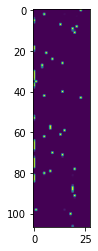

In [16]:
# Plotting the heatmap
fig, ax = plt.subplots()
im = ax.imshow(np.array(logits_ip))
plt.show()